In [1]:
import numpy
import csv
import re
import pandas as pd
b = './'
path_value = b + r"data - eurusd.csv"
data = pd.read_csv(path_value, header=None)
#data = pd.read_csv(path_value, names=['Text', 'Date', 'Time'], usecols=[5, 6, 7])
data

,0,1,2,3,4,5,6,7
0,Аналитические обзоры Форекс: ФРС повышает став...,Павел Власов,0,https://www.instaforex.com/ru/forex_analysis/3...,NaN,И хоть покупатели европейской валюты частично ...,02.06.2022,13:56
1,Аналитические обзоры Форекс: Евро дали отсрочку,Игорь Ковалев,1,https://www.instaforex.com/ru/forex_analysis/3...,NaN,"Не говори гоп, пока не перепрыгнешь. Шестой па...",02.06.2022,13:55
2,Аналитические обзоры Форекс: XAU/USD: в зоне к...,Юрий Толин,2,https://www.instaforex.com/ru/forex_analysis/3...,NaN,Как сообщили в среду в Институте управления сн...,02.06.2022,13:07
3,Аналитические обзоры Форекс: Для рубля незамен...,Игорь Ковалев,1,https://www.instaforex.com/ru/forex_analysis/3...,NaN,Свято место пусто не бывает. Уход с российског...,02.06.2022,12:57
4,Аналитические обзоры Форекс: USD/CAD. Ястребин...,Ирина Манзенко,3,https://www.instaforex.com/ru/forex_analysis/3...,NaN,Банк Канады по итогам июньского заседания повы...,02.06.2022,12:38
...,...,...,...,...,...,...,...,...
5996,Аналитические обзоры Форекс: Доллар продолжит ...,Виктор Василевский,5,https://www.instaforex.com/ru/forex_analysis/2...,NaN,Сегодня основные мировые торговые площадки зак...,10.04.2020,09:52
5997,Аналитические обзоры Форекс: Дневник трейдера ...,Михаил Макаров,11,https://www.instaforex.com/ru/forex_analysis/2...,NaN,\n\nКоррекционный рост нефти выдохся: нефть сн...,10.04.2020,09:15
5998,Аналитические обзоры Форекс: Нефтяной консенсу...,Андрей Шевченко,6,https://www.instaforex.com/ru/forex_analysis/2...,NaN,\n\nВ четверг 9 апреля Россия и Саудовская Ара...,10.04.2020,08:54
5999,Аналитические обзоры Форекс: EUR/USD. Нескольк...,Ирина Манзенко,3,https://www.instaforex.com/ru/forex_analysis/2...,NaN,Сегодня многие торговые площадки мира закрыты ...,10.04.2020,08:26


In [2]:
import warnings
warnings.filterwarnings("default")

In [3]:
a = pd.ExcelFile(b + "currencies_fixed_4.xlsx")
tables = []
for sheet in a.sheet_names:
    tables.append(pd.read_excel(b + "currencies_fixed_4.xlsx", sheet))

In [4]:
len(tables)

16

In [5]:
result_table = pd.concat(tables)

In [7]:
result_table

,№,Currency,Author,Author ID,Publication Date (RU),Publication Time (RU),DateTime (RU),Link RU,Title RU,Text RU,Recommendations RU,Publication Date (EN),Publication Time (EN),DateTime (EN),Link EN,Title EN,Text EN,Recommendations EN\n,Nearest Closing Time,Closing Value
0,0,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,18.07.19,07:41,201907180741,https://www.instaforex.com/forex_analysis/147884,"Analysis of AUD/JPY for July 18, 2019: AUD to ...",The Australian dollar started the week with we...,-\n,201907180741,7569
1,1,AUDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,16.05.19,08:49,201905160849,https://www.instaforex.com/forex_analysis/142903,AUDJPY: AUD to regain momentum over JPY for sh...,AUD is struggling to gain momentum over JPY re...,-\n,201905160849,7569
2,2,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,19.04.19,06:01,201904190601,https://www.instaforex.com/forex_analysis/140750,"Fundamental Analysis of AUD/JPY for April 19, ...",AUD/JPY has been rejected off the 80.50 resist...,-\n,201904190601,8000
3,3,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,11.04.19,12:49,201904111249,https://www.instaforex.com/forex_analysis/140128,"Fundamental Analysis of AUD/JPY for April 11, ...",The Australian economy is currently going thro...,-\n,201904111249,7951
4,4,AUDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,29.03.19,11:48,201903291148,https://www.instaforex.com/forex_analysis/139053,AUDJPY consolidates as both economies struggle,The Australian economy is experiencing a decl...,-\n,201903291148,7854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,06.06.17,11:28,201706061128,https://www.instaforex.com/forex_analysis/92601,"Fundamental Analysis of USDJPY for June 6, 2017",After rejecting off the resistance of 111.60 r...,-\n,201706061128,10963
195,195,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,08.05.17,14:32,201705081432,https://www.instaforex.com/forex_analysis/91448,"Fundamental Analysis of USDJPY for May 8, 2017",USD/JPY has been in a bullish non-volatile tre...,-\n,201705081432,11261
196,196,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,26.04.17,17:13,201704261713,https://www.instaforex.com/forex_analysis/90996,"USDJPY Fundamental Analysis April 26, 2017",USDJPY has been in a bullish trend since the s...,-\n,201704261713,11151
197,197,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,10.03.17,06:00,201703100600,https://www.instaforex.com/forex_analysis/89088,"USDJPY Fundamental Analysis March 10, 2017",USD/JPY has shown a good amount of strength re...,-\n,201703100600,11518


In [7]:
d = result_table[(result_table['Text RU'] != '-') & (result_table['Recommendations RU'] == '-')]

In [8]:
texts = d['Text RU']
labeled_texts = []
labels = []
for t in texts:
    xd = t.split(' ')
    prev = False
    word = None
    for token in xd: 
        if prev and 'позиц' in token:
            labeled_texts += [t]
            labels += [-1 if 'коротк' in word else 1]
        elif 'коротк' in token.lower() or 'длин' in token.lower(): 
            prev = True 
            word = token.lower()
        else:
            prev = False
            word = None

In [9]:
text = 'Text RU'
target = 'target'
labeled_data = pd.DataFrame({text:labeled_texts, target:labels})

In [10]:
labeled_data.iloc[0]

Text RU    Австралийский доллар испытывает давление как в...
target                                                    -1
Name: 0, dtype: object

In [11]:
x = result_table
current_data = x[(x['Recommendations RU'] != '-') & (x['Text RU'] != '-')]

In [12]:
def f(x): 
    t = x.split('.')[1]
    if 'длин' in t or 'куп' in t:
        return 1
    return -1

In [13]:
razmetka = current_data['Recommendations RU'].apply(f)

In [14]:
current_data['target'] = razmetka

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2908\1452565820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['target'] = razmetka


In [15]:
data_labeled = current_data[['Text RU', 'Recommendations RU', 'target']]

In [16]:
data_labeled.to_excel('labeled_data.xlsx')

In [17]:
x = current_data[['Recommendations RU', 'target']]

In [92]:
k = 500
x['Recommendations RU'].iloc[k]

'Пара GBP/USD на 4-часовом таймфрейме начала корректироваться к мувингу. Таким образом, сегодня рекомендуется открывать новые короткие позиции с целями 1,2695 и 1,2634 как только индикатор Хайкен Аши развернется обратно вниз или цена отскочит от скользящей средней линии. Торговать пару на повышение с целями 1,2867 и 1,2939 рекомендуется, если цена вернется в область выше скользящей средней линии. '

In [19]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import pymorphy2
transformation_dictionary = {}
morph = pymorphy2.MorphAnalyzer()
snowball = SnowballStemmer(language="russian")
def apply_tokenizing(t): 
    text = re.sub('[^А-Яа-я ]', " ", t).lower()
    tokenized = word_tokenize(text, language="russian")
    stops = stopwords.words("russian")
    filtered_tokens = []
    for token in tokenized: 
        if token not in stops:
            stem_lem_word = [morph.parse(snowball.stem(token))[0].normal_form]
            transformation_dictionary[stem_lem_word[0]] = token
            filtered_tokens += stem_lem_word
    return " ".join(filtered_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)


In [20]:
new_data = pd.concat([current_data.copy()[['Text RU', 'target']], labeled_data])

In [93]:
d = pd.read_csv('labeled_rukami.csv')

In [96]:
d['Биграмма'] = d['Биграмма'].apply(lambda x: x.replace('\t', ''))

In [98]:
d[d['Вес'] < 0]

,Биграмма,Вес
23,коротких позиций,-16.791241
24,нисходящая движение,-6.283698
25,восходящего коррекция,-5.578206
26,нисходящая тенденций,-4.451759
27,новый нисходящая,-4.294507
28,рассматривать коротких,-4.288267
29,движение вниз,-3.891295
30,продаж целом,-3.752761
31,открывать коротких,-3.710323
32,открытия коротких,-3.627058


In [26]:
d['Биграмма'] = d['Биграмма'].apply(apply_tokenizing)

In [21]:
labeled_data = labeled_data['Text RU'].apply(lambda text: [apply_tokenizing(t) for t in text.split('.')])

In [22]:
labeled_data

0      [австралийск доллар испытыва давленый пара аме...
1      [австралийск доллар сегодна получ поддержк сто...
2      [австралийск доллар пара американск валюта ито...
3      [австралийск доллар пара американск валюта про...
4      [миллион австралийск доллар ден таков цена кар...
                             ...                        
817    [суд динамик защитн инструмент трейдер вс мень...
818    [эскалац америка китайск торг конфликт оказ по...
819    [эскалац америка китайск торг конфликт оказ по...
820    [и пара американск валюта сегодна штурм ю отме...
821    [торг недело откр гэп сторона ослабить америка...
Name: Text RU, Length: 822, dtype: object

In [28]:
import numpy as np
risk = ['риск', 'рисков']
recomendation = ['рекоменд', 'рекомендац']
one_more_label = []
for splited_text in labeled_data: 
    values = [0] * len(splited_text)
    is_recomendation = None
    for i, sentence in enumerate(splited_text):
        cumsum = 0
        for bigramm, value in d.values:
            if bigramm in sentence:
                for risk_token in risk: 
                    if f'{risk_token} ' + bigramm not in sentence: 
                        cumsum += value
                if is_recomendation is None:
                    for recomendation_token in recomendation:
                        if f'{recomendation_token} ' + bigramm in sentence:
                            is_recomendation = i
                            cumsum += value                               
        values[i] = cumsum
    values = np.array(values)
    cumsum = values.sum()
    if cumsum > 0: 
        one_more_label += [1]
    else:
        one_more_label += [-1]
from collections import Counter
Counter(one_more_label)

Counter({-1: 399, 1: 423})

In [29]:
my_new_labeled_data = pd.DataFrame({'Text':labeled_data, 'old labels':labels, 'new labels':one_more_label})

In [30]:
my_new_labeled_data['Text'] = my_new_labeled_data['Text'].apply(lambda t: " ".join(t))

In [31]:
handled = pd.read_csv('handmade.csv', index_col=0)

In [87]:
d[d['Вес'] > 0]

,Биграмма,Вес
0,длина позица,18.213269
1,восходить движена,6.605941
2,сгладить вверх,6.185501
3,нисходить коррекца,5.853878
4,продажа рекоменд,5.592142
5,рассматривый длина,5.427762
6,остав длина,4.991296
7,покупк целый,4.940506
8,движена вверх,4.094063
9,восходить тенденц,4.088868


In [32]:
handled['Text RU'] = handled['Text RU'].apply(apply_tokenizing)

In [33]:
handled

,Text RU,old labels,new labels,hand labeled
29,час таймфрейм техническ дать старша кан линейн...,-1,1,-1
29,австралийск доллар получ небольша поддержк сто...,-1,1,-1
42,американск валюта недело стать фаворит валютн ...,-1,1,-1
59,час таймфрейм техническ дать старша кан линейн...,-1,1,1
59,австралийск доллар пара американск валюта вчер...,-1,1,1
...,...,...,...,...
764,фунт продолж колеб широкий ценовый диапазон ре...,-1,1,1
793,ключев событ вчерашн день эт повысить процентн...,1,-1,-1
805,час таймфреймтехническ дать старша кан линейн ...,-1,1,-1
805,японск валюта переменчивый внешн фундаментальн...,-1,1,1


In [34]:
new_labels = []
cnt = 0 
for i, _, old_lab in my_new_labeled_data.values:
    marked = False
    for j, _, _, lab in handled.values:
        if i in j or j in i:
            new_labels.append(lab)
            marked = True
            cnt += 1
    if not marked:
        new_labels.append(old_lab)

In [35]:
my_new_labeled_data['last labels'] = new_labels

In [36]:
first_data = current_data[['Text RU', 'target']]
first_data['Text RU'] = first_data['Text RU'].apply(apply_tokenizing)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2908\3653975434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_data['Text RU'] = first_data['Text RU'].apply(apply_tokenizing)


In [37]:
second_data = my_new_labeled_data[['Text', 'last labels']]
second_data.rename({'Text':'Text RU', 'last labels':'target'}, axis=1, inplace=True)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_2908\3923627685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_data.rename({'Text':'Text RU', 'last labels':'target'}, axis=1, inplace=True)


In [38]:
final_data = pd.concat([first_data, second_data])
final_data = final_data[final_data['target'] != 0]

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [40]:
text = 'Text RU'
target = 'target'
final_data = final_data.drop_duplicates(text)
final_data_without_na = final_data[final_data[target].notna()]

In [41]:
final_data_without_na.shape

(1298, 2)

In [42]:
X, y = final_data_without_na[text], final_data_without_na[target]

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=1)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv_bigram, cv_word = CountVectorizer(ngram_range=(2,2)), CountVectorizer(ngram_range=(1,1))
tfid_bigram, tfid_word = TfidfVectorizer(ngram_range=(2, 2)), TfidfVectorizer(ngram_range=(1, 1))

X, X1, X_cv_bigram, X_cv_word = tfid_bigram.fit_transform(x_train), tfid_word.fit_transform(x_train), cv_bigram.fit_transform(x_train), cv_word.fit_transform(x_train)
X_test, X_test1, X_test_cv_bigram, X_test_cv_word = tfid_bigram.transform(x_valid), tfid_word.transform(x_valid), cv_bigram.transform(x_valid), cv_word.transform(x_valid)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
param_grid = { 
    
        'SGD__alpha': np.logspace(-3, 2)
}
crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', SGDClassifier(n_jobs=-1))]),
             param_grid={'SGD__alpha': array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128...
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])},
             scoring=make_scorer(f1_score))

In [46]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.7517341597667896,
 {'SGD__alpha': 0.001},
 0.6524695403765053,
 {'SGD__alpha': 0.001},
 0.7517341597667896,
 {'SGD__alpha': 0.22229964825261955},
 0.892905188143341,
 {'SGD__alpha': 0.06866488450043001})

In [182]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGDClassifier(alpha=0.001, n_jobs=1, random_state=12), X_test_cv_bigram, y_valid, cv=5)

array([0.71794872, 0.71794872, 0.84615385, 0.82051282, 0.82051282])

# SGD

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
best = SGDClassifier(alpha = crs.best_params_['SGD__alpha'])
best1 = SGDClassifier(alpha = crs1.best_params_['SGD__alpha'], random_state=12)
best2 = SGDClassifier(alpha = crs2.best_params_['SGD__alpha'], random_state=12)
best3 = SGDClassifier(alpha = crs3.best_params_['SGD__alpha'], random_state=12)
best.fit(X, y_train), best1.fit(X1, y_train), best2.fit(X_cv_bigram, y_train), best3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(best.predict(X_test), y_valid)}')
print(f'TF-IDF word {f1_score(best1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {f1_score(best2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {f1_score(best3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.7885714285714286
TF-IDF word 0.6745562130177515
CountVectorizer bigram 0.9148936170212767
CountVectorizer word 0.7486033519553073


In [59]:
print(f'TF-IDF bigram {accuracy_score(best.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(best1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(best2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(best3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8102564102564103
TF-IDF word 0.717948717948718
CountVectorizer bigram 0.9179487179487179
CountVectorizer word 0.7692307692307693


# SVC

In [55]:
from sklearn.svm import LinearSVC
text = 'Text RU'
target = 'target'
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', LinearSVC())])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', LinearSVC())])
param_grid = { 
    
        'SGD__C': [ 10 ** i for i in range(-5, 3) ]
}
crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', LinearSVC())]),
             param_grid={'SGD__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                    100]},
             scoring=make_scorer(f1_score))

In [56]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.7753040033259926,
 {'SGD__C': 100},
 0.6739136143208178,
 {'SGD__C': 1},
 0.7753040033259926,
 {'SGD__C': 0.01},
 0.8875043563930415,
 {'SGD__C': 0.1})

In [57]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=crs.best_params_['SGD__C'])
svc1 = LinearSVC(C=crs.best_params_['SGD__C'])
svc2 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc3 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc.fit(X, y_train), svc1.fit(X1, y_train), svc2.fit(X_cv_bigram, y_train), svc3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(svc.predict(X_test), y_valid)}')
print(f'TF-IDF word {f1_score(svc1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {f1_score(svc2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {f1_score(svc3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8241758241758241
TF-IDF word 0.6956521739130435
CountVectorizer bigram 0.9148936170212767
CountVectorizer word 0.7415730337078652


In [58]:
print(f'TF-IDF bigram {accuracy_score(svc.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(svc1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(svc2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(svc3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8358974358974359
TF-IDF word 0.7128205128205128
CountVectorizer bigram 0.9179487179487179
CountVectorizer word 0.764102564102564


# CATBOOST

In [60]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat1 = CatBoostClassifier()
cat2 = CatBoostClassifier()
cat3 = CatBoostClassifier()
cat.fit(X, y_train), cat1.fit(X1, y_train), cat2.fit(X_cv_bigram, y_train), cat3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(cat.predict(X_test), y_valid)}')
print(f'TF-IDF word {f1_score(cat1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {f1_score(cat2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {f1_score(cat3.predict(X_test_cv_word), y_valid)}')

Learning rate set to 0.010743
0:	learn: 0.6841042	total: 921ms	remaining: 15m 19s
1:	learn: 0.6762866	total: 1.56s	remaining: 13m
2:	learn: 0.6642975	total: 2.22s	remaining: 12m 19s
3:	learn: 0.6528284	total: 2.89s	remaining: 11m 58s
4:	learn: 0.6420904	total: 3.57s	remaining: 11m 50s
5:	learn: 0.6303582	total: 4.32s	remaining: 11m 55s
6:	learn: 0.6209473	total: 5.04s	remaining: 11m 55s
7:	learn: 0.6079440	total: 5.78s	remaining: 11m 56s
8:	learn: 0.6009528	total: 6.54s	remaining: 12m
9:	learn: 0.5953539	total: 7.28s	remaining: 12m
10:	learn: 0.5880468	total: 7.98s	remaining: 11m 57s
11:	learn: 0.5813509	total: 8.66s	remaining: 11m 53s
12:	learn: 0.5720562	total: 9.36s	remaining: 11m 51s
13:	learn: 0.5631732	total: 10s	remaining: 11m 47s
14:	learn: 0.5578633	total: 10.7s	remaining: 11m 44s
15:	learn: 0.5520722	total: 11.5s	remaining: 11m 46s
16:	learn: 0.5464191	total: 12.2s	remaining: 11m 46s
17:	learn: 0.5373669	total: 12.9s	remaining: 11m 41s
18:	learn: 0.5273809	total: 13.5s	remain

154:	learn: 0.2025403	total: 1m 43s	remaining: 9m 25s
155:	learn: 0.2016384	total: 1m 44s	remaining: 9m 25s
156:	learn: 0.2010134	total: 1m 45s	remaining: 9m 24s
157:	learn: 0.2002092	total: 1m 45s	remaining: 9m 23s
158:	learn: 0.1994084	total: 1m 46s	remaining: 9m 23s
159:	learn: 0.1991439	total: 1m 47s	remaining: 9m 22s
160:	learn: 0.1986793	total: 1m 47s	remaining: 9m 21s
161:	learn: 0.1983082	total: 1m 48s	remaining: 9m 20s
162:	learn: 0.1979572	total: 1m 49s	remaining: 9m 20s
163:	learn: 0.1974479	total: 1m 49s	remaining: 9m 19s
164:	learn: 0.1967527	total: 1m 50s	remaining: 9m 18s
165:	learn: 0.1956404	total: 1m 51s	remaining: 9m 17s
166:	learn: 0.1947559	total: 1m 51s	remaining: 9m 17s
167:	learn: 0.1940895	total: 1m 52s	remaining: 9m 16s
168:	learn: 0.1934928	total: 1m 53s	remaining: 9m 15s
169:	learn: 0.1927943	total: 1m 53s	remaining: 9m 15s
170:	learn: 0.1922678	total: 1m 54s	remaining: 9m 14s
171:	learn: 0.1915878	total: 1m 55s	remaining: 9m 13s
172:	learn: 0.1909109	total:

308:	learn: 0.1530718	total: 3m 26s	remaining: 7m 42s
309:	learn: 0.1526107	total: 3m 27s	remaining: 7m 42s
310:	learn: 0.1524093	total: 3m 28s	remaining: 7m 41s
311:	learn: 0.1519727	total: 3m 28s	remaining: 7m 40s
312:	learn: 0.1516662	total: 3m 29s	remaining: 7m 39s
313:	learn: 0.1516265	total: 3m 30s	remaining: 7m 39s
314:	learn: 0.1510002	total: 3m 30s	remaining: 7m 38s
315:	learn: 0.1507866	total: 3m 31s	remaining: 7m 37s
316:	learn: 0.1507085	total: 3m 32s	remaining: 7m 37s
317:	learn: 0.1504669	total: 3m 32s	remaining: 7m 36s
318:	learn: 0.1504005	total: 3m 33s	remaining: 7m 35s
319:	learn: 0.1503361	total: 3m 34s	remaining: 7m 34s
320:	learn: 0.1502299	total: 3m 34s	remaining: 7m 34s
321:	learn: 0.1501879	total: 3m 35s	remaining: 7m 33s
322:	learn: 0.1497566	total: 3m 36s	remaining: 7m 32s
323:	learn: 0.1493039	total: 3m 36s	remaining: 7m 32s
324:	learn: 0.1487718	total: 3m 37s	remaining: 7m 31s
325:	learn: 0.1487170	total: 3m 37s	remaining: 7m 30s
326:	learn: 0.1486391	total:

462:	learn: 0.1268516	total: 5m 8s	remaining: 5m 57s
463:	learn: 0.1268186	total: 5m 8s	remaining: 5m 56s
464:	learn: 0.1267629	total: 5m 9s	remaining: 5m 56s
465:	learn: 0.1264286	total: 5m 10s	remaining: 5m 55s
466:	learn: 0.1260950	total: 5m 10s	remaining: 5m 54s
467:	learn: 0.1260428	total: 5m 11s	remaining: 5m 54s
468:	learn: 0.1259770	total: 5m 12s	remaining: 5m 53s
469:	learn: 0.1259302	total: 5m 12s	remaining: 5m 52s
470:	learn: 0.1258903	total: 5m 13s	remaining: 5m 52s
471:	learn: 0.1257545	total: 5m 14s	remaining: 5m 51s
472:	learn: 0.1252582	total: 5m 14s	remaining: 5m 50s
473:	learn: 0.1248767	total: 5m 15s	remaining: 5m 50s
474:	learn: 0.1248388	total: 5m 16s	remaining: 5m 49s
475:	learn: 0.1247630	total: 5m 17s	remaining: 5m 49s
476:	learn: 0.1246121	total: 5m 17s	remaining: 5m 48s
477:	learn: 0.1243507	total: 5m 18s	remaining: 5m 47s
478:	learn: 0.1239698	total: 5m 19s	remaining: 5m 47s
479:	learn: 0.1239375	total: 5m 19s	remaining: 5m 46s
480:	learn: 0.1237067	total: 5m

615:	learn: 0.1051147	total: 6m 50s	remaining: 4m 15s
616:	learn: 0.1047458	total: 6m 51s	remaining: 4m 15s
617:	learn: 0.1046303	total: 6m 52s	remaining: 4m 14s
618:	learn: 0.1043005	total: 6m 52s	remaining: 4m 14s
619:	learn: 0.1042533	total: 6m 53s	remaining: 4m 13s
620:	learn: 0.1041392	total: 6m 54s	remaining: 4m 12s
621:	learn: 0.1038389	total: 6m 54s	remaining: 4m 12s
622:	learn: 0.1037228	total: 6m 55s	remaining: 4m 11s
623:	learn: 0.1036578	total: 6m 56s	remaining: 4m 10s
624:	learn: 0.1035462	total: 6m 57s	remaining: 4m 10s
625:	learn: 0.1034876	total: 6m 57s	remaining: 4m 9s
626:	learn: 0.1033937	total: 6m 58s	remaining: 4m 8s
627:	learn: 0.1031506	total: 6m 59s	remaining: 4m 8s
628:	learn: 0.1030419	total: 6m 59s	remaining: 4m 7s
629:	learn: 0.1028940	total: 7m	remaining: 4m 6s
630:	learn: 0.1027161	total: 7m 1s	remaining: 4m 6s
631:	learn: 0.1026162	total: 7m 1s	remaining: 4m 5s
632:	learn: 0.1023393	total: 7m 2s	remaining: 4m 4s
633:	learn: 0.1020176	total: 7m 3s	remainin

769:	learn: 0.0808756	total: 8m 34s	remaining: 2m 33s
770:	learn: 0.0805582	total: 8m 35s	remaining: 2m 33s
771:	learn: 0.0805073	total: 8m 36s	remaining: 2m 32s
772:	learn: 0.0804574	total: 8m 36s	remaining: 2m 31s
773:	learn: 0.0803748	total: 8m 37s	remaining: 2m 31s
774:	learn: 0.0801191	total: 8m 38s	remaining: 2m 30s
775:	learn: 0.0796523	total: 8m 38s	remaining: 2m 29s
776:	learn: 0.0794459	total: 8m 39s	remaining: 2m 29s
777:	learn: 0.0793938	total: 8m 40s	remaining: 2m 28s
778:	learn: 0.0793220	total: 8m 40s	remaining: 2m 27s
779:	learn: 0.0792372	total: 8m 41s	remaining: 2m 27s
780:	learn: 0.0788920	total: 8m 42s	remaining: 2m 26s
781:	learn: 0.0786269	total: 8m 42s	remaining: 2m 25s
782:	learn: 0.0785695	total: 8m 43s	remaining: 2m 25s
783:	learn: 0.0783837	total: 8m 44s	remaining: 2m 24s
784:	learn: 0.0783297	total: 8m 44s	remaining: 2m 23s
785:	learn: 0.0782786	total: 8m 45s	remaining: 2m 23s
786:	learn: 0.0782123	total: 8m 46s	remaining: 2m 22s
787:	learn: 0.0781349	total:

922:	learn: 0.0608522	total: 10m 18s	remaining: 51.6s
923:	learn: 0.0606149	total: 10m 19s	remaining: 50.9s
924:	learn: 0.0604445	total: 10m 19s	remaining: 50.3s
925:	learn: 0.0603542	total: 10m 20s	remaining: 49.6s
926:	learn: 0.0602637	total: 10m 21s	remaining: 48.9s
927:	learn: 0.0602252	total: 10m 21s	remaining: 48.3s
928:	learn: 0.0601852	total: 10m 22s	remaining: 47.6s
929:	learn: 0.0601429	total: 10m 23s	remaining: 46.9s
930:	learn: 0.0601054	total: 10m 23s	remaining: 46.2s
931:	learn: 0.0597819	total: 10m 24s	remaining: 45.6s
932:	learn: 0.0597359	total: 10m 25s	remaining: 44.9s
933:	learn: 0.0596837	total: 10m 26s	remaining: 44.2s
934:	learn: 0.0596326	total: 10m 26s	remaining: 43.6s
935:	learn: 0.0595901	total: 10m 27s	remaining: 42.9s
936:	learn: 0.0594078	total: 10m 28s	remaining: 42.2s
937:	learn: 0.0592595	total: 10m 28s	remaining: 41.6s
938:	learn: 0.0591676	total: 10m 29s	remaining: 40.9s
939:	learn: 0.0589678	total: 10m 30s	remaining: 40.2s
940:	learn: 0.0587652	total:

78:	learn: 0.3471542	total: 9.05s	remaining: 1m 45s
79:	learn: 0.3444948	total: 9.16s	remaining: 1m 45s
80:	learn: 0.3433328	total: 9.28s	remaining: 1m 45s
81:	learn: 0.3422210	total: 9.39s	remaining: 1m 45s
82:	learn: 0.3410985	total: 9.52s	remaining: 1m 45s
83:	learn: 0.3385430	total: 9.63s	remaining: 1m 45s
84:	learn: 0.3360849	total: 9.74s	remaining: 1m 44s
85:	learn: 0.3341054	total: 9.86s	remaining: 1m 44s
86:	learn: 0.3330613	total: 9.97s	remaining: 1m 44s
87:	learn: 0.3322344	total: 10.1s	remaining: 1m 44s
88:	learn: 0.3306470	total: 10.2s	remaining: 1m 44s
89:	learn: 0.3291845	total: 10.3s	remaining: 1m 44s
90:	learn: 0.3270761	total: 10.4s	remaining: 1m 44s
91:	learn: 0.3261928	total: 10.6s	remaining: 1m 44s
92:	learn: 0.3243118	total: 10.7s	remaining: 1m 44s
93:	learn: 0.3218724	total: 10.8s	remaining: 1m 43s
94:	learn: 0.3198382	total: 10.9s	remaining: 1m 43s
95:	learn: 0.3189900	total: 11s	remaining: 1m 43s
96:	learn: 0.3177804	total: 11.1s	remaining: 1m 43s
97:	learn: 0.3

235:	learn: 0.2316079	total: 26.8s	remaining: 1m 26s
236:	learn: 0.2311972	total: 27s	remaining: 1m 26s
237:	learn: 0.2309788	total: 27.1s	remaining: 1m 26s
238:	learn: 0.2305793	total: 27.2s	remaining: 1m 26s
239:	learn: 0.2304654	total: 27.3s	remaining: 1m 26s
240:	learn: 0.2301361	total: 27.4s	remaining: 1m 26s
241:	learn: 0.2298008	total: 27.5s	remaining: 1m 26s
242:	learn: 0.2288485	total: 27.6s	remaining: 1m 26s
243:	learn: 0.2284715	total: 27.7s	remaining: 1m 25s
244:	learn: 0.2278964	total: 27.8s	remaining: 1m 25s
245:	learn: 0.2273565	total: 28s	remaining: 1m 25s
246:	learn: 0.2269973	total: 28.1s	remaining: 1m 25s
247:	learn: 0.2267271	total: 28.2s	remaining: 1m 25s
248:	learn: 0.2263743	total: 28.3s	remaining: 1m 25s
249:	learn: 0.2262816	total: 28.4s	remaining: 1m 25s
250:	learn: 0.2261827	total: 28.5s	remaining: 1m 25s
251:	learn: 0.2259424	total: 28.6s	remaining: 1m 24s
252:	learn: 0.2253609	total: 28.7s	remaining: 1m 24s
253:	learn: 0.2249933	total: 28.8s	remaining: 1m 2

391:	learn: 0.1869192	total: 44.6s	remaining: 1m 9s
392:	learn: 0.1868207	total: 44.7s	remaining: 1m 9s
393:	learn: 0.1866822	total: 44.8s	remaining: 1m 8s
394:	learn: 0.1865912	total: 44.9s	remaining: 1m 8s
395:	learn: 0.1858883	total: 45s	remaining: 1m 8s
396:	learn: 0.1857595	total: 45.1s	remaining: 1m 8s
397:	learn: 0.1854323	total: 45.3s	remaining: 1m 8s
398:	learn: 0.1851072	total: 45.4s	remaining: 1m 8s
399:	learn: 0.1850311	total: 45.5s	remaining: 1m 8s
400:	learn: 0.1848852	total: 45.6s	remaining: 1m 8s
401:	learn: 0.1847712	total: 45.7s	remaining: 1m 8s
402:	learn: 0.1842617	total: 45.8s	remaining: 1m 7s
403:	learn: 0.1840275	total: 45.9s	remaining: 1m 7s
404:	learn: 0.1838707	total: 46.1s	remaining: 1m 7s
405:	learn: 0.1835668	total: 46.2s	remaining: 1m 7s
406:	learn: 0.1833054	total: 46.3s	remaining: 1m 7s
407:	learn: 0.1827837	total: 46.4s	remaining: 1m 7s
408:	learn: 0.1824043	total: 46.5s	remaining: 1m 7s
409:	learn: 0.1822553	total: 46.6s	remaining: 1m 7s
410:	learn: 0.

552:	learn: 0.1525568	total: 1m 3s	remaining: 50.9s
553:	learn: 0.1523894	total: 1m 3s	remaining: 50.8s
554:	learn: 0.1522713	total: 1m 3s	remaining: 50.7s
555:	learn: 0.1522102	total: 1m 3s	remaining: 50.6s
556:	learn: 0.1520889	total: 1m 3s	remaining: 50.5s
557:	learn: 0.1520177	total: 1m 3s	remaining: 50.4s
558:	learn: 0.1517542	total: 1m 3s	remaining: 50.3s
559:	learn: 0.1515678	total: 1m 3s	remaining: 50.2s
560:	learn: 0.1513255	total: 1m 3s	remaining: 50s
561:	learn: 0.1512863	total: 1m 4s	remaining: 49.9s
562:	learn: 0.1510753	total: 1m 4s	remaining: 49.8s
563:	learn: 0.1504050	total: 1m 4s	remaining: 49.7s
564:	learn: 0.1500373	total: 1m 4s	remaining: 49.6s
565:	learn: 0.1499465	total: 1m 4s	remaining: 49.4s
566:	learn: 0.1495114	total: 1m 4s	remaining: 49.3s
567:	learn: 0.1494383	total: 1m 4s	remaining: 49.2s
568:	learn: 0.1492796	total: 1m 4s	remaining: 49.1s
569:	learn: 0.1486622	total: 1m 4s	remaining: 49s
570:	learn: 0.1483498	total: 1m 5s	remaining: 48.8s
571:	learn: 0.14

709:	learn: 0.1203733	total: 1m 21s	remaining: 33.2s
710:	learn: 0.1200381	total: 1m 21s	remaining: 33s
711:	learn: 0.1197764	total: 1m 21s	remaining: 32.9s
712:	learn: 0.1196426	total: 1m 21s	remaining: 32.8s
713:	learn: 0.1195175	total: 1m 21s	remaining: 32.7s
714:	learn: 0.1192328	total: 1m 21s	remaining: 32.6s
715:	learn: 0.1190636	total: 1m 21s	remaining: 32.5s
716:	learn: 0.1188796	total: 1m 21s	remaining: 32.3s
717:	learn: 0.1182460	total: 1m 22s	remaining: 32.2s
718:	learn: 0.1181444	total: 1m 22s	remaining: 32.1s
719:	learn: 0.1178736	total: 1m 22s	remaining: 32s
720:	learn: 0.1174966	total: 1m 22s	remaining: 31.9s
721:	learn: 0.1170067	total: 1m 22s	remaining: 31.8s
722:	learn: 0.1166602	total: 1m 22s	remaining: 31.7s
723:	learn: 0.1165125	total: 1m 22s	remaining: 31.5s
724:	learn: 0.1163248	total: 1m 22s	remaining: 31.4s
725:	learn: 0.1162417	total: 1m 22s	remaining: 31.3s
726:	learn: 0.1161544	total: 1m 23s	remaining: 31.2s
727:	learn: 0.1156655	total: 1m 23s	remaining: 31.

865:	learn: 0.0923121	total: 1m 39s	remaining: 15.3s
866:	learn: 0.0919902	total: 1m 39s	remaining: 15.2s
867:	learn: 0.0916538	total: 1m 39s	remaining: 15.1s
868:	learn: 0.0914458	total: 1m 39s	remaining: 15s
869:	learn: 0.0912775	total: 1m 39s	remaining: 14.9s
870:	learn: 0.0912363	total: 1m 39s	remaining: 14.8s
871:	learn: 0.0909893	total: 1m 39s	remaining: 14.6s
872:	learn: 0.0909295	total: 1m 39s	remaining: 14.5s
873:	learn: 0.0908848	total: 1m 39s	remaining: 14.4s
874:	learn: 0.0905016	total: 1m 40s	remaining: 14.3s
875:	learn: 0.0904377	total: 1m 40s	remaining: 14.2s
876:	learn: 0.0902925	total: 1m 40s	remaining: 14.1s
877:	learn: 0.0902208	total: 1m 40s	remaining: 14s
878:	learn: 0.0899070	total: 1m 40s	remaining: 13.8s
879:	learn: 0.0895789	total: 1m 40s	remaining: 13.7s
880:	learn: 0.0893128	total: 1m 40s	remaining: 13.6s
881:	learn: 0.0892700	total: 1m 40s	remaining: 13.5s
882:	learn: 0.0892179	total: 1m 40s	remaining: 13.4s
883:	learn: 0.0890280	total: 1m 41s	remaining: 13.

21:	learn: 0.5157065	total: 12.4s	remaining: 9m 10s
22:	learn: 0.5104342	total: 13s	remaining: 9m 10s
23:	learn: 0.5052597	total: 13.5s	remaining: 9m 9s
24:	learn: 0.4994048	total: 14.1s	remaining: 9m 9s
25:	learn: 0.4945279	total: 14.7s	remaining: 9m 9s
26:	learn: 0.4897333	total: 15.2s	remaining: 9m 8s
27:	learn: 0.4850586	total: 15.8s	remaining: 9m 7s
28:	learn: 0.4770971	total: 16.3s	remaining: 9m 7s
29:	learn: 0.4726613	total: 16.9s	remaining: 9m 6s
30:	learn: 0.4684366	total: 17.5s	remaining: 9m 5s
31:	learn: 0.4622476	total: 18s	remaining: 9m 5s
32:	learn: 0.4572798	total: 18.6s	remaining: 9m 5s
33:	learn: 0.4533940	total: 19.2s	remaining: 9m 4s
34:	learn: 0.4485581	total: 19.7s	remaining: 9m 4s
35:	learn: 0.4429480	total: 20.3s	remaining: 9m 3s
36:	learn: 0.4375178	total: 20.9s	remaining: 9m 3s
37:	learn: 0.4318863	total: 21.4s	remaining: 9m 2s
38:	learn: 0.4284135	total: 22s	remaining: 9m 1s
39:	learn: 0.4221625	total: 22.5s	remaining: 9m
40:	learn: 0.4163987	total: 23.1s	rema

178:	learn: 0.1994167	total: 1m 41s	remaining: 7m 45s
179:	learn: 0.1990354	total: 1m 42s	remaining: 7m 44s
180:	learn: 0.1989446	total: 1m 42s	remaining: 7m 44s
181:	learn: 0.1983202	total: 1m 43s	remaining: 7m 43s
182:	learn: 0.1980739	total: 1m 43s	remaining: 7m 42s
183:	learn: 0.1974702	total: 1m 44s	remaining: 7m 42s
184:	learn: 0.1969601	total: 1m 44s	remaining: 7m 41s
185:	learn: 0.1967983	total: 1m 45s	remaining: 7m 40s
186:	learn: 0.1962993	total: 1m 45s	remaining: 7m 40s
187:	learn: 0.1959847	total: 1m 46s	remaining: 7m 39s
188:	learn: 0.1958940	total: 1m 47s	remaining: 7m 39s
189:	learn: 0.1957195	total: 1m 47s	remaining: 7m 38s
190:	learn: 0.1950553	total: 1m 48s	remaining: 7m 37s
191:	learn: 0.1945716	total: 1m 48s	remaining: 7m 37s
192:	learn: 0.1939330	total: 1m 49s	remaining: 7m 37s
193:	learn: 0.1932347	total: 1m 49s	remaining: 7m 36s
194:	learn: 0.1926511	total: 1m 50s	remaining: 7m 35s
195:	learn: 0.1922198	total: 1m 50s	remaining: 7m 35s
196:	learn: 0.1914136	total:

331:	learn: 0.1628115	total: 3m 8s	remaining: 6m 19s
332:	learn: 0.1627427	total: 3m 9s	remaining: 6m 19s
333:	learn: 0.1626383	total: 3m 9s	remaining: 6m 18s
334:	learn: 0.1620741	total: 3m 10s	remaining: 6m 17s
335:	learn: 0.1617210	total: 3m 10s	remaining: 6m 17s
336:	learn: 0.1616727	total: 3m 11s	remaining: 6m 16s
337:	learn: 0.1614996	total: 3m 12s	remaining: 6m 16s
338:	learn: 0.1614513	total: 3m 12s	remaining: 6m 16s
339:	learn: 0.1611235	total: 3m 13s	remaining: 6m 15s
340:	learn: 0.1608199	total: 3m 14s	remaining: 6m 15s
341:	learn: 0.1606263	total: 3m 14s	remaining: 6m 14s
342:	learn: 0.1605799	total: 3m 15s	remaining: 6m 14s
343:	learn: 0.1605217	total: 3m 15s	remaining: 6m 13s
344:	learn: 0.1600142	total: 3m 16s	remaining: 6m 13s
345:	learn: 0.1599700	total: 3m 17s	remaining: 6m 12s
346:	learn: 0.1599113	total: 3m 17s	remaining: 6m 12s
347:	learn: 0.1598700	total: 3m 18s	remaining: 6m 11s
348:	learn: 0.1598049	total: 3m 18s	remaining: 6m 10s
349:	learn: 0.1597539	total: 3m

485:	learn: 0.1385426	total: 4m 38s	remaining: 4m 54s
486:	learn: 0.1383290	total: 4m 38s	remaining: 4m 53s
487:	learn: 0.1381193	total: 4m 39s	remaining: 4m 53s
488:	learn: 0.1380780	total: 4m 39s	remaining: 4m 52s
489:	learn: 0.1379485	total: 4m 40s	remaining: 4m 51s
490:	learn: 0.1378968	total: 4m 40s	remaining: 4m 51s
491:	learn: 0.1378745	total: 4m 41s	remaining: 4m 50s
492:	learn: 0.1378410	total: 4m 42s	remaining: 4m 50s
493:	learn: 0.1377832	total: 4m 42s	remaining: 4m 49s
494:	learn: 0.1371877	total: 4m 43s	remaining: 4m 48s
495:	learn: 0.1368795	total: 4m 43s	remaining: 4m 48s
496:	learn: 0.1368133	total: 4m 44s	remaining: 4m 47s
497:	learn: 0.1366932	total: 4m 44s	remaining: 4m 47s
498:	learn: 0.1366297	total: 4m 45s	remaining: 4m 46s
499:	learn: 0.1361954	total: 4m 46s	remaining: 4m 46s
500:	learn: 0.1361464	total: 4m 46s	remaining: 4m 45s
501:	learn: 0.1359708	total: 4m 47s	remaining: 4m 44s
502:	learn: 0.1359097	total: 4m 47s	remaining: 4m 44s
503:	learn: 0.1358303	total:

638:	learn: 0.1145713	total: 6m 4s	remaining: 3m 25s
639:	learn: 0.1143350	total: 6m 4s	remaining: 3m 25s
640:	learn: 0.1142715	total: 6m 5s	remaining: 3m 24s
641:	learn: 0.1141796	total: 6m 6s	remaining: 3m 24s
642:	learn: 0.1140155	total: 6m 6s	remaining: 3m 23s
643:	learn: 0.1137305	total: 6m 7s	remaining: 3m 22s
644:	learn: 0.1135495	total: 6m 7s	remaining: 3m 22s
645:	learn: 0.1134831	total: 6m 8s	remaining: 3m 21s
646:	learn: 0.1134344	total: 6m 8s	remaining: 3m 21s
647:	learn: 0.1133544	total: 6m 9s	remaining: 3m 20s
648:	learn: 0.1132978	total: 6m 10s	remaining: 3m 20s
649:	learn: 0.1131594	total: 6m 10s	remaining: 3m 19s
650:	learn: 0.1131002	total: 6m 11s	remaining: 3m 19s
651:	learn: 0.1125864	total: 6m 11s	remaining: 3m 18s
652:	learn: 0.1124510	total: 6m 12s	remaining: 3m 17s
653:	learn: 0.1120745	total: 6m 13s	remaining: 3m 17s
654:	learn: 0.1120193	total: 6m 13s	remaining: 3m 16s
655:	learn: 0.1117394	total: 6m 14s	remaining: 3m 16s
656:	learn: 0.1116621	total: 6m 14s	re

792:	learn: 0.0889202	total: 7m 43s	remaining: 2m 1s
793:	learn: 0.0885441	total: 7m 44s	remaining: 2m
794:	learn: 0.0884505	total: 7m 45s	remaining: 1m 59s
795:	learn: 0.0881684	total: 7m 45s	remaining: 1m 59s
796:	learn: 0.0881133	total: 7m 46s	remaining: 1m 58s
797:	learn: 0.0880568	total: 7m 47s	remaining: 1m 58s
798:	learn: 0.0878748	total: 7m 47s	remaining: 1m 57s
799:	learn: 0.0878154	total: 7m 48s	remaining: 1m 57s
800:	learn: 0.0876526	total: 7m 48s	remaining: 1m 56s
801:	learn: 0.0875915	total: 7m 49s	remaining: 1m 55s
802:	learn: 0.0875271	total: 7m 50s	remaining: 1m 55s
803:	learn: 0.0874393	total: 7m 50s	remaining: 1m 54s
804:	learn: 0.0872748	total: 7m 51s	remaining: 1m 54s
805:	learn: 0.0869877	total: 7m 52s	remaining: 1m 53s
806:	learn: 0.0869234	total: 7m 52s	remaining: 1m 53s
807:	learn: 0.0868499	total: 7m 53s	remaining: 1m 52s
808:	learn: 0.0867948	total: 7m 53s	remaining: 1m 51s
809:	learn: 0.0865185	total: 7m 54s	remaining: 1m 51s
810:	learn: 0.0861914	total: 7m 5

947:	learn: 0.0684602	total: 9m 18s	remaining: 30.6s
948:	learn: 0.0683901	total: 9m 19s	remaining: 30s
949:	learn: 0.0682739	total: 9m 19s	remaining: 29.5s
950:	learn: 0.0682018	total: 9m 20s	remaining: 28.9s
951:	learn: 0.0681586	total: 9m 20s	remaining: 28.3s
952:	learn: 0.0680734	total: 9m 21s	remaining: 27.7s
953:	learn: 0.0679018	total: 9m 22s	remaining: 27.1s
954:	learn: 0.0678586	total: 9m 22s	remaining: 26.5s
955:	learn: 0.0677949	total: 9m 23s	remaining: 25.9s
956:	learn: 0.0676909	total: 9m 23s	remaining: 25.3s
957:	learn: 0.0676490	total: 9m 24s	remaining: 24.7s
958:	learn: 0.0675910	total: 9m 24s	remaining: 24.2s
959:	learn: 0.0675419	total: 9m 25s	remaining: 23.6s
960:	learn: 0.0672726	total: 9m 26s	remaining: 23s
961:	learn: 0.0671055	total: 9m 26s	remaining: 22.4s
962:	learn: 0.0670653	total: 9m 27s	remaining: 21.8s
963:	learn: 0.0669795	total: 9m 27s	remaining: 21.2s
964:	learn: 0.0669371	total: 9m 28s	remaining: 20.6s
965:	learn: 0.0666949	total: 9m 29s	remaining: 20s

113:	learn: 0.3005155	total: 3.54s	remaining: 27.5s
114:	learn: 0.2994069	total: 3.58s	remaining: 27.5s
115:	learn: 0.2990012	total: 3.61s	remaining: 27.5s
116:	learn: 0.2981678	total: 3.64s	remaining: 27.5s
117:	learn: 0.2973712	total: 3.67s	remaining: 27.4s
118:	learn: 0.2963864	total: 3.7s	remaining: 27.4s
119:	learn: 0.2948567	total: 3.73s	remaining: 27.4s
120:	learn: 0.2941968	total: 3.76s	remaining: 27.3s
121:	learn: 0.2934976	total: 3.79s	remaining: 27.3s
122:	learn: 0.2927257	total: 3.82s	remaining: 27.3s
123:	learn: 0.2919614	total: 3.85s	remaining: 27.2s
124:	learn: 0.2907782	total: 3.88s	remaining: 27.2s
125:	learn: 0.2901209	total: 3.91s	remaining: 27.1s
126:	learn: 0.2895641	total: 3.94s	remaining: 27.1s
127:	learn: 0.2889005	total: 3.96s	remaining: 27s
128:	learn: 0.2883361	total: 4s	remaining: 27s
129:	learn: 0.2873463	total: 4.03s	remaining: 26.9s
130:	learn: 0.2861411	total: 4.05s	remaining: 26.9s
131:	learn: 0.2855543	total: 4.08s	remaining: 26.8s
132:	learn: 0.284996

272:	learn: 0.2315624	total: 8.22s	remaining: 21.9s
273:	learn: 0.2310287	total: 8.25s	remaining: 21.9s
274:	learn: 0.2307414	total: 8.28s	remaining: 21.8s
275:	learn: 0.2304880	total: 8.31s	remaining: 21.8s
276:	learn: 0.2303258	total: 8.35s	remaining: 21.8s
277:	learn: 0.2301586	total: 8.37s	remaining: 21.7s
278:	learn: 0.2298414	total: 8.4s	remaining: 21.7s
279:	learn: 0.2295824	total: 8.43s	remaining: 21.7s
280:	learn: 0.2291800	total: 8.46s	remaining: 21.6s
281:	learn: 0.2287536	total: 8.48s	remaining: 21.6s
282:	learn: 0.2283324	total: 8.51s	remaining: 21.6s
283:	learn: 0.2279357	total: 8.54s	remaining: 21.5s
284:	learn: 0.2278345	total: 8.56s	remaining: 21.5s
285:	learn: 0.2276308	total: 8.59s	remaining: 21.4s
286:	learn: 0.2273384	total: 8.62s	remaining: 21.4s
287:	learn: 0.2272401	total: 8.65s	remaining: 21.4s
288:	learn: 0.2270200	total: 8.68s	remaining: 21.4s
289:	learn: 0.2267540	total: 8.71s	remaining: 21.3s
290:	learn: 0.2267079	total: 8.74s	remaining: 21.3s
291:	learn: 0

431:	learn: 0.1949162	total: 12.9s	remaining: 16.9s
432:	learn: 0.1947517	total: 12.9s	remaining: 16.9s
433:	learn: 0.1944030	total: 12.9s	remaining: 16.9s
434:	learn: 0.1939369	total: 13s	remaining: 16.9s
435:	learn: 0.1937734	total: 13s	remaining: 16.8s
436:	learn: 0.1937313	total: 13s	remaining: 16.8s
437:	learn: 0.1936514	total: 13.1s	remaining: 16.8s
438:	learn: 0.1935638	total: 13.1s	remaining: 16.7s
439:	learn: 0.1935076	total: 13.1s	remaining: 16.7s
440:	learn: 0.1933369	total: 13.1s	remaining: 16.7s
441:	learn: 0.1932776	total: 13.2s	remaining: 16.6s
442:	learn: 0.1930519	total: 13.2s	remaining: 16.6s
443:	learn: 0.1929337	total: 13.2s	remaining: 16.6s
444:	learn: 0.1928732	total: 13.3s	remaining: 16.5s
445:	learn: 0.1927054	total: 13.3s	remaining: 16.5s
446:	learn: 0.1925773	total: 13.3s	remaining: 16.5s
447:	learn: 0.1923478	total: 13.4s	remaining: 16.5s
448:	learn: 0.1921689	total: 13.4s	remaining: 16.4s
449:	learn: 0.1919816	total: 13.4s	remaining: 16.4s
450:	learn: 0.1919

591:	learn: 0.1642504	total: 17.6s	remaining: 12.2s
592:	learn: 0.1640950	total: 17.7s	remaining: 12.1s
593:	learn: 0.1639114	total: 17.7s	remaining: 12.1s
594:	learn: 0.1637782	total: 17.8s	remaining: 12.1s
595:	learn: 0.1635189	total: 17.8s	remaining: 12.1s
596:	learn: 0.1633324	total: 17.8s	remaining: 12s
597:	learn: 0.1632838	total: 17.8s	remaining: 12s
598:	learn: 0.1632377	total: 17.9s	remaining: 12s
599:	learn: 0.1630590	total: 17.9s	remaining: 11.9s
600:	learn: 0.1628997	total: 17.9s	remaining: 11.9s
601:	learn: 0.1628374	total: 18s	remaining: 11.9s
602:	learn: 0.1623618	total: 18s	remaining: 11.8s
603:	learn: 0.1621366	total: 18s	remaining: 11.8s
604:	learn: 0.1620660	total: 18.1s	remaining: 11.8s
605:	learn: 0.1620258	total: 18.1s	remaining: 11.8s
606:	learn: 0.1612102	total: 18.1s	remaining: 11.7s
607:	learn: 0.1609911	total: 18.1s	remaining: 11.7s
608:	learn: 0.1609236	total: 18.2s	remaining: 11.7s
609:	learn: 0.1607885	total: 18.2s	remaining: 11.6s
610:	learn: 0.1607204	to

754:	learn: 0.1308026	total: 22.5s	remaining: 7.3s
755:	learn: 0.1307207	total: 22.5s	remaining: 7.27s
756:	learn: 0.1306261	total: 22.6s	remaining: 7.24s
757:	learn: 0.1305951	total: 22.6s	remaining: 7.21s
758:	learn: 0.1305536	total: 22.6s	remaining: 7.18s
759:	learn: 0.1303685	total: 22.7s	remaining: 7.15s
760:	learn: 0.1300872	total: 22.7s	remaining: 7.12s
761:	learn: 0.1299254	total: 22.7s	remaining: 7.09s
762:	learn: 0.1296477	total: 22.7s	remaining: 7.06s
763:	learn: 0.1294442	total: 22.8s	remaining: 7.03s
764:	learn: 0.1294112	total: 22.8s	remaining: 7s
765:	learn: 0.1293318	total: 22.8s	remaining: 6.97s
766:	learn: 0.1292876	total: 22.9s	remaining: 6.95s
767:	learn: 0.1291949	total: 22.9s	remaining: 6.91s
768:	learn: 0.1291633	total: 22.9s	remaining: 6.88s
769:	learn: 0.1291081	total: 23s	remaining: 6.86s
770:	learn: 0.1288764	total: 23s	remaining: 6.83s
771:	learn: 0.1287525	total: 23s	remaining: 6.8s
772:	learn: 0.1284560	total: 23s	remaining: 6.77s
773:	learn: 0.1282176	tot

918:	learn: 0.1058120	total: 27.4s	remaining: 2.41s
919:	learn: 0.1056374	total: 27.4s	remaining: 2.38s
920:	learn: 0.1055859	total: 27.5s	remaining: 2.35s
921:	learn: 0.1055348	total: 27.5s	remaining: 2.32s
922:	learn: 0.1054468	total: 27.5s	remaining: 2.29s
923:	learn: 0.1052183	total: 27.5s	remaining: 2.27s
924:	learn: 0.1051609	total: 27.6s	remaining: 2.23s
925:	learn: 0.1050979	total: 27.6s	remaining: 2.21s
926:	learn: 0.1047651	total: 27.6s	remaining: 2.17s
927:	learn: 0.1047407	total: 27.7s	remaining: 2.15s
928:	learn: 0.1044843	total: 27.7s	remaining: 2.12s
929:	learn: 0.1043312	total: 27.7s	remaining: 2.08s
930:	learn: 0.1042893	total: 27.7s	remaining: 2.06s
931:	learn: 0.1042137	total: 27.8s	remaining: 2.03s
932:	learn: 0.1041667	total: 27.8s	remaining: 2s
933:	learn: 0.1040230	total: 27.8s	remaining: 1.97s
934:	learn: 0.1037877	total: 27.9s	remaining: 1.94s
935:	learn: 0.1037365	total: 27.9s	remaining: 1.91s
936:	learn: 0.1035285	total: 27.9s	remaining: 1.88s
937:	learn: 0.1

In [62]:
print(f'TF-IDF bigram {accuracy_score(cat.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(cat1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(cat2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(cat3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.9333333333333333
TF-IDF word 0.8717948717948718
CountVectorizer bigram 0.9384615384615385
CountVectorizer word 0.8717948717948718


# RANDOM FOREST

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500)
rf1 = RandomForestClassifier(500)
rf2 = RandomForestClassifier(500)
rf3 = RandomForestClassifier(500)
rf.fit(X, y_train), rf1.fit(X1, y_train), rf2.fit(X_cv_bigram, y_train), rf3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(rf.predict(X_test), y_valid)}')
print(f'TF-IDF word {f1_score(rf1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {f1_score(rf2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {f1_score(rf3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.7857142857142857
TF-IDF word 0.7012987012987012
CountVectorizer bigram 0.8571428571428571
CountVectorizer word 0.7341772151898733


In [65]:

print(f'TF-IDF bigram {accuracy_score(rf.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(rf1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(rf2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(rf3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8153846153846154
TF-IDF word 0.764102564102564
CountVectorizer bigram 0.882051282051282
CountVectorizer word 0.7743589743589744


# Оценка качества работы моделей

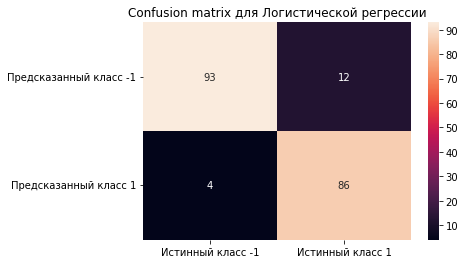

In [73]:
best_models = [(best2, 'Логистической регрессии'), (svc2, 'Метода опорных векторов'), (cat2, 'Градиентного бустинга'), (rf2, 'Случайного леса')]
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
def estimate(best2, name):
    plt.title(f'Confusion matrix для {name}')
    sns.heatmap(pd.DataFrame(confusion_matrix(best2.predict(X_test_cv_bigram), y_valid.astype(np.int64)),\
                            columns=['Истинный класс -1', 'Истинный класс 1'], index=['Предсказанный класс -1', \
                                   'Предсказанный класс 1']), annot=True, fmt='')
estimate(*best_models[0])

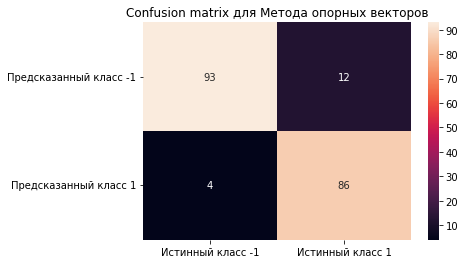

In [74]:
estimate(*best_models[1])

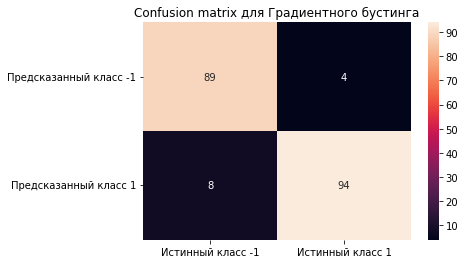

In [75]:
estimate(*best_models[2])

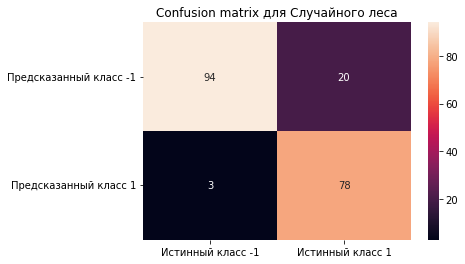

In [76]:
estimate(*best_models[3])

In [77]:
from sklearn.metrics import classification_report
def summarize(algo, name):
    print(f'Classification report для {name}')
    print(classification_report(algo.predict(X_test_cv_bigram), y_valid)

In [78]:
summarize(*best_models[0])

Classification report для Логистической регрессии
              precision    recall  f1-score   support

          -1       0.96      0.89      0.92       105
           1       0.88      0.96      0.91        90

    accuracy                           0.92       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.92      0.92      0.92       195



In [79]:
summarize(*best_models[1])

Classification report для Метода опорных векторов
              precision    recall  f1-score   support

          -1       0.96      0.89      0.92       105
           1       0.88      0.96      0.91        90

    accuracy                           0.92       195
   macro avg       0.92      0.92      0.92       195
weighted avg       0.92      0.92      0.92       195



In [80]:
summarize(*best_models[2])

Classification report для Градиентного бустинга
              precision    recall  f1-score   support

          -1       0.92      0.96      0.94        93
           1       0.96      0.92      0.94       102

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195



In [81]:
summarize(*best_models[3])

Classification report для Случайного леса
              precision    recall  f1-score   support

          -1       0.97      0.82      0.89       114
           1       0.80      0.96      0.87        81

    accuracy                           0.88       195
   macro avg       0.88      0.89      0.88       195
weighted avg       0.90      0.88      0.88       195



In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(best2.predict(X_test_cv_bigram), y_valid)

0.9206349206349207

In [177]:
import matplotlib.pyplot as plt 
import numpy as np 
def visualize_coefficients(classifier, feature_names, name, n_top_features=50):
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    figure, axis = plt.subplots(1, 2, figsize=(20,15))
    axis[0].bar(np.arange(n_top_features), coef[positive_coefficients])
    axis[1].bar(np.arange(n_top_features), abs(coef[negative_coefficients]))
    axis[0].set_title(f"Топ {n_top_features} положительных слов в словаре эмоциональной окраски для {name}")
    axis[1].set_title(f"Топ {n_top_features} негативных слов в словаре эмоциональной окраски для {name}")
    #axis[1].set_title(f"Топ 25 слов в словаре эмоциональной окраски для {name}")
    #plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    axis[0].set_xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[positive_coefficients],
        rotation=60,
        ha="right",
    );
    axis[1].set_xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[negative_coefficients],
        rotation=60,
        ha="right",
    );
    plt.show();

<Figure size 1080x360 with 0 Axes>

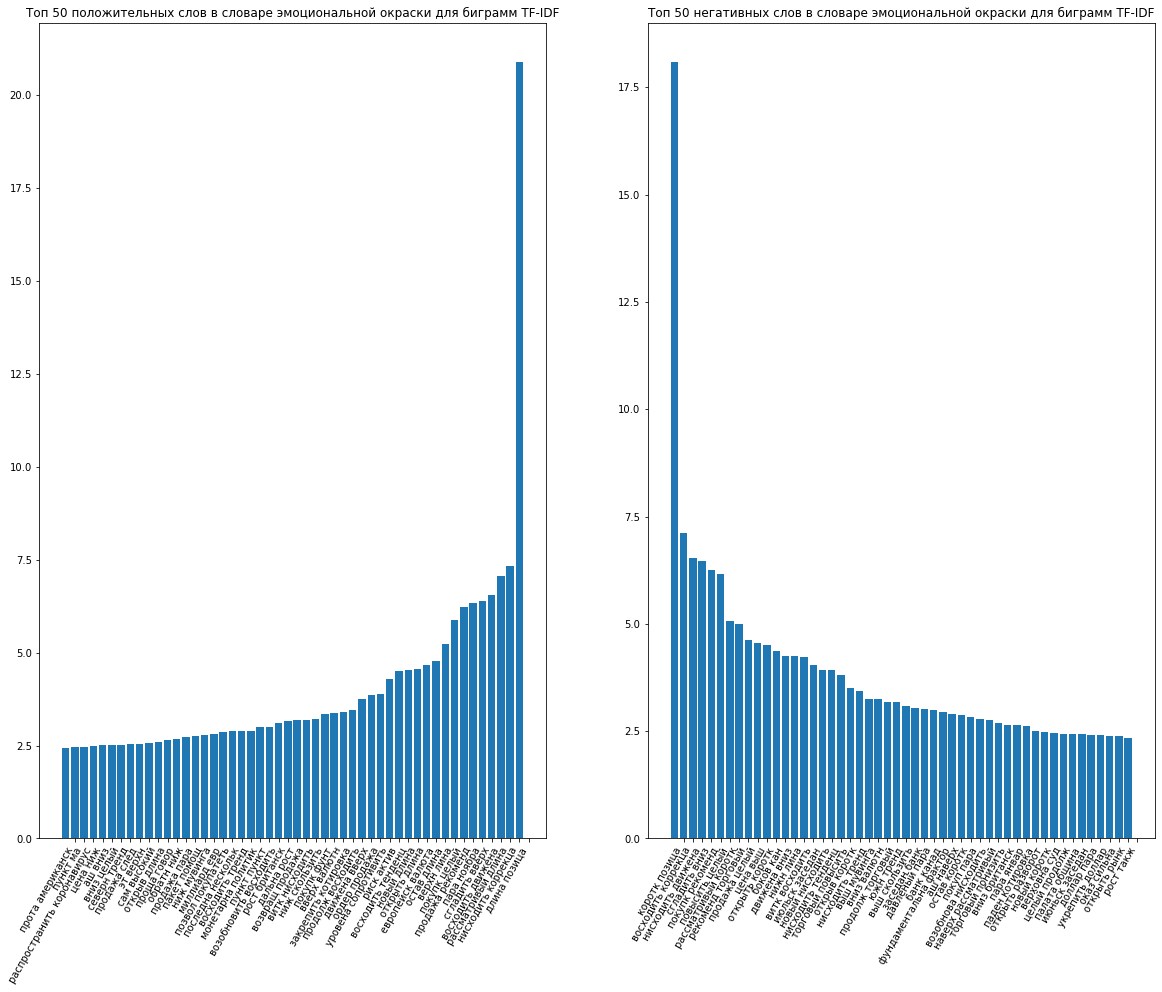

In [178]:
visualize_coefficients(best, tfid_bigram.get_feature_names(), 'биграмм TF-IDF')

<Figure size 1080x360 with 0 Axes>

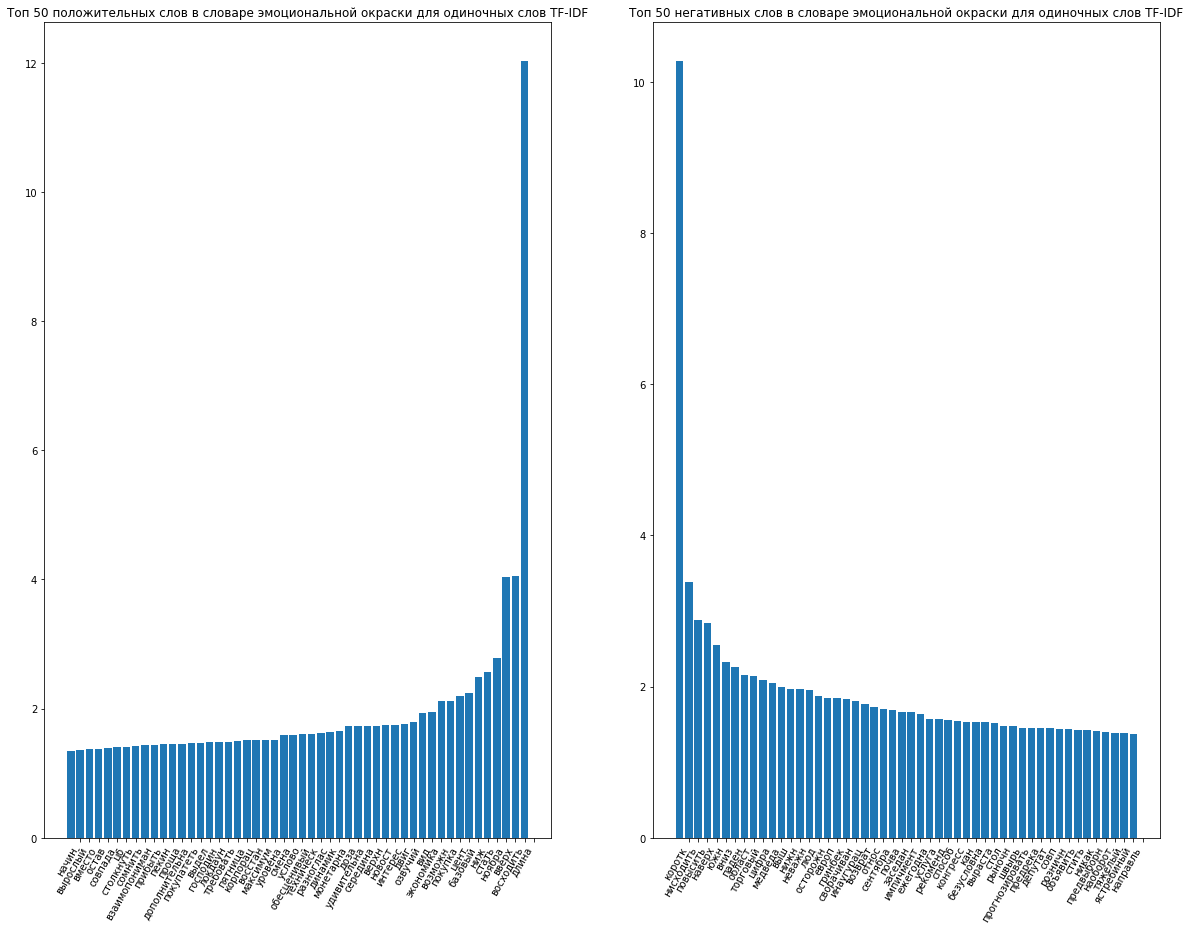

In [179]:
visualize_coefficients(best1, tfid_word.get_feature_names(), 'одиночных слов TF-IDF')

<Figure size 1080x360 with 0 Axes>

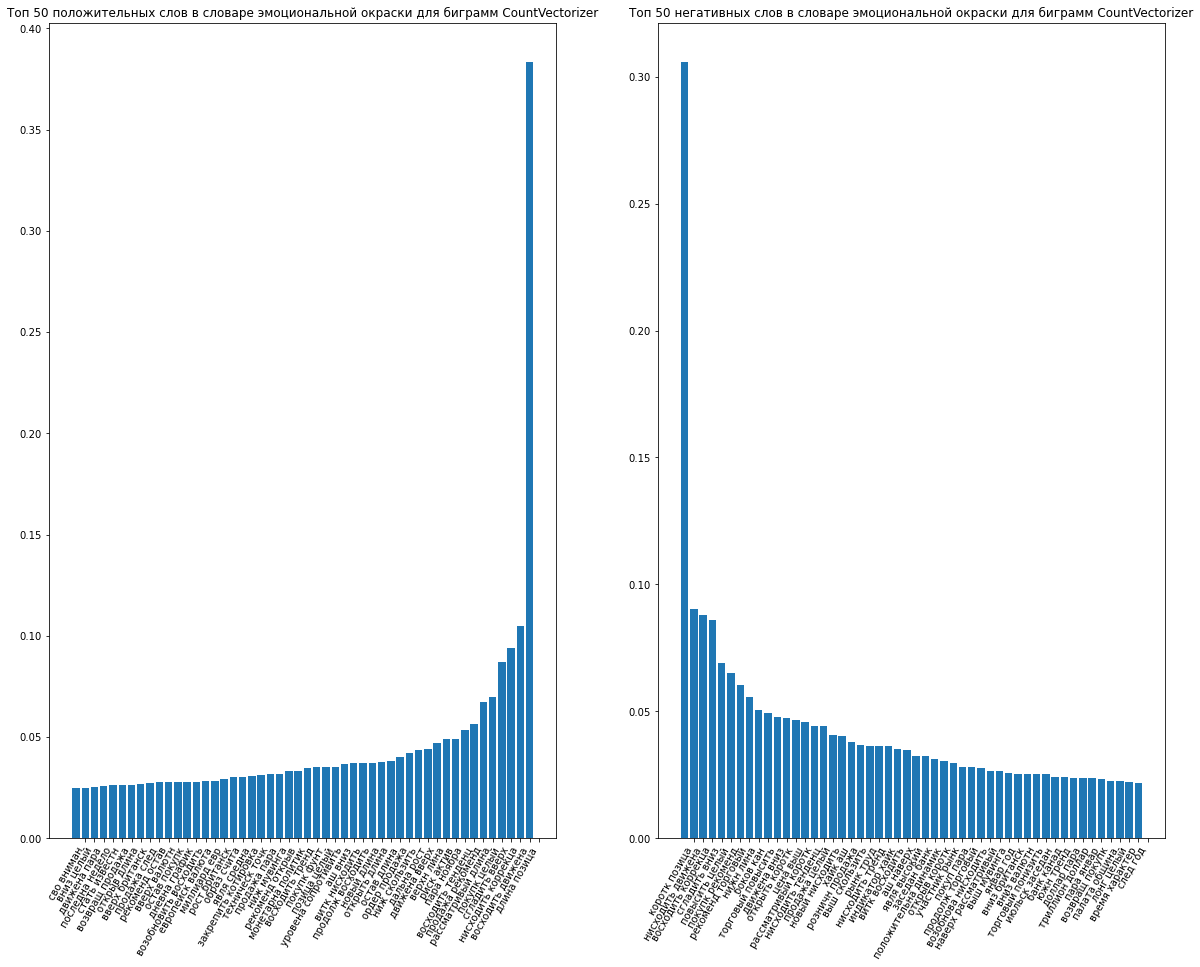

In [180]:
visualize_coefficients(best2, cv_bigram.get_feature_names(), 'биграмм CountVectorizer')

<Figure size 1080x360 with 0 Axes>

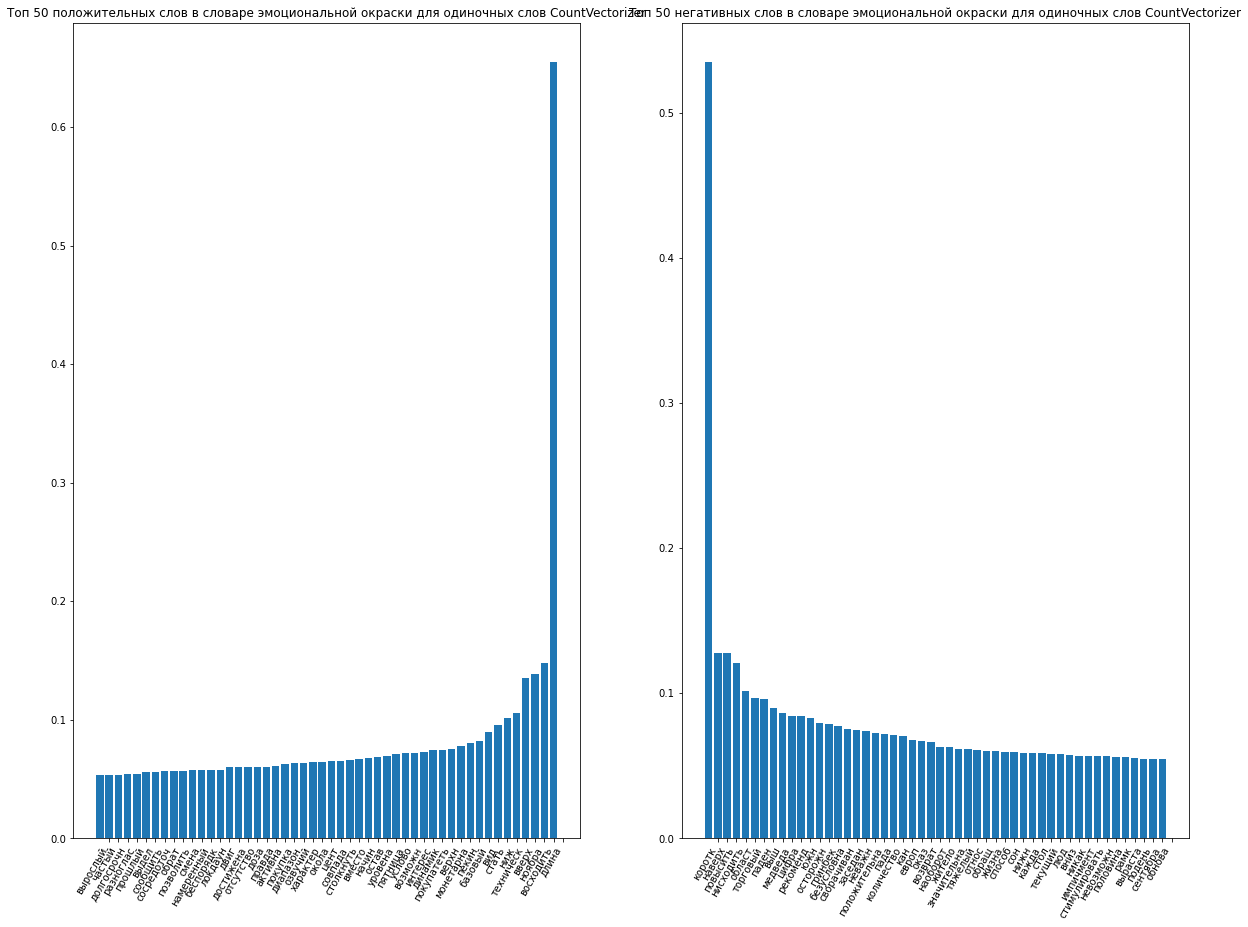

In [181]:
visualize_coefficients(best3, cv_word.get_feature_names(), 'одиночных слов CountVectorizer')

In [39]:
transformation_dictionary

{'час': 'час',
 'таймфрейм': 'таймфрейме',
 'техническ': 'технически',
 'дать': 'данный',
 'старша': 'старших',
 'кан': 'канал',
 'линейн': 'линейной',
 'регресс': 'регрессии',
 'направить': 'направлении',
 'вниз': 'вниз',
 'младш': 'младшими',
 'скользить': 'скользящих',
 'средна': 'средней',
 'сгладить': 'сглаженная',
 'вбок': 'вбок',
 'валютн': 'валютных',
 'пара': 'пары',
 'пятница': 'пятницу',
 'август': 'августа',
 'двиг': 'двигаться',
 'очный': 'очень',
 'неплохой': 'неплохие',
 'течен': 'течение',
 'сутки': 'суток',
 'подорожить': 'подорожала',
 'пункт': 'пунктов',
 'сам': 'самым',
 'дело': 'деловой',
 'так': 'такие',
 'движена': 'движение',
 'некотор': 'некоторые',
 'степена': 'степени',
 'неожид': 'неожиданное',
 'волатильна': 'волатильности',
 'последна': 'последние',
 'недело': 'неделю',
 'сниз': 'снизилась',
 'минимальна': 'минимально',
 'значный': 'значениях',
 'запланиров': 'запланировано',
 'никак': 'никаких',
 'важн': 'важной',
 'событ': 'событий',
 'публикац': 'публик

In [40]:
def save_dictionary(model, tfid, ngramm_name, path):
    coef = model.coef_.ravel() 
    feature_names = tfid.get_feature_names()
    indexes = np.argsort(coef)
    return pd.DataFrame(np.vstack([np.array(feature_names)[indexes], sorted(coef)]).T, \
                 columns=[ngramm_name, 'Вес'])#.to_csv(path, sep=' ', index=None)
dictionary = save_dictionary(best, tfid_bigram, 'Биграмма', b + 'bigrams_weights.csv')
#save_dictionary(best1, tfid_word, 'Одиночное слово', b + 'words_weights.csv')

C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
pm = pymorphy2.MorphAnalyzer()
def make_normal_form_word(text): 
    tokens = text.split()
    for i in range(len(tokens)):
        tokens[i] = pm.parse(transformation_dictionary.get(tokens[i], tokens[i]))[0][0]
    return " ".join(tokens)
dictionary['Биграмма'] = dictionary['Биграмма'].apply(make_normal_form_word)

C:\Users\Андрей\AppData\Roaming\Python\Python39\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)


In [63]:
negative = dictionary.head(100)
positive = dictionary.tail(100)
result = pd.concat([positive, negative])
result.sort_values('Вес', ascending=False).to_excel(r'C:\Users\Андрей\Desktop\asd\Dictionaries-of-emotional-assessment-in-finance\dict.xlsx', sheet_name='биграмма', index=False)

In [67]:
negative

,Биграмма,Вес
0,коротких позиций,-16.791241002148396
1,нисходящая движение,-6.283697717604336
2,покупки рекомендуется,-6.234557663572576
3,сглаженная вниз,-6.0358658573708395
4,восходящего коррекция,-5.57820567102025
...,...,...
95,канадский доллара,-1.8172532105089716
96,достаточно большому,-1.8156269951905593
97,палатой общин,-1.8114253759336225
98,пары такие,-1.8015928380252149


In [64]:
cat3.predict(X_cv_bigram)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)